In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

In [ ]:
stu = pd.read_csv('/content/online_course_engagement_data (1).csv')

In [ ]:
stu.head()

,UserID,CourseCategory,TimeSpentOnCourse,NumberOfVideosWatched,NumberOfQuizzesTaken,QuizScores,CompletionRate,DeviceType,CourseCompletion
0,5618,Health,29.979719,17,3,50.365656,20.860773,1,0
1,4326,Arts,27.802640,1,5,62.615970,65.632415,1,0
2,5849,Arts,86.820485,14,2,78.458962,63.812007,1,1
3,4992,Science,35.038427,17,10,59.198853,95.433162,0,1
4,3866,Programming,92.490647,16,0,98.428285,18.102478,0,0


In [ ]:
stu.isnull().sum()

,0
UserID,0
CourseCategory,0
TimeSpentOnCourse,0
NumberOfVideosWatched,0
NumberOfQuizzesTaken,0
QuizScores,0
CompletionRate,0
DeviceType,0
CourseCompletion,0


In [ ]:
stu.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9000 entries, 0 to 8999
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   UserID                 9000 non-null   int64  
 1   CourseCategory         9000 non-null   object 
 2   TimeSpentOnCourse      9000 non-null   float64
 3   NumberOfVideosWatched  9000 non-null   int64  
 4   NumberOfQuizzesTaken   9000 non-null   int64  
 5   QuizScores             9000 non-null   float64
 6   CompletionRate         9000 non-null   float64
 7   DeviceType             9000 non-null   int64  
 8   CourseCompletion       9000 non-null   int64  
dtypes: float64(3), int64(5), object(1)
memory usage: 632.9+ KB


In [ ]:
stu.shape

(9000, 9)

In [ ]:
x = stu.iloc[:,[2,6]].values

In [ ]:
print(x)

[[29.97971935 20.86077271]
 [27.80263951 65.63241524]
 [86.8204847  63.81200659]
 ...
 [38.21251152 70.18815868]
 [70.04866546 72.97522521]
 [93.58978113 11.29907109]]


In [ ]:
wcss=[]

for i in range(1,11):
  kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
  kmeans.fit(x)
  wcss.append(kmeans.inertia_)

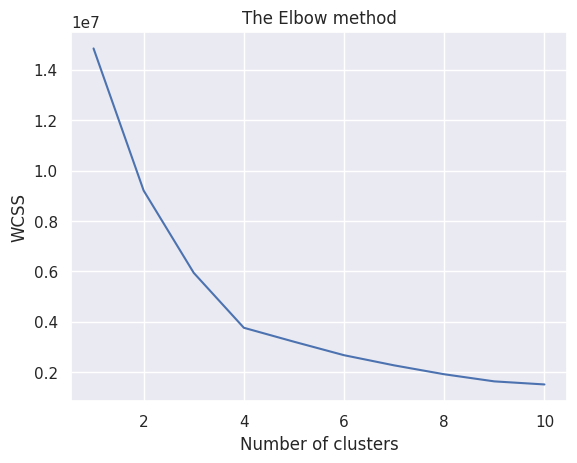

In [ ]:
sns.set()
plt.plot(range(1,11),wcss)
plt.title('The Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [ ]:
kmeans = KMeans(n_clusters = 4, init = 'k-means++', random_state = 0)
y = kmeans.fit_predict(x)
print(y)

[3 0 2 ... 0 2 1]


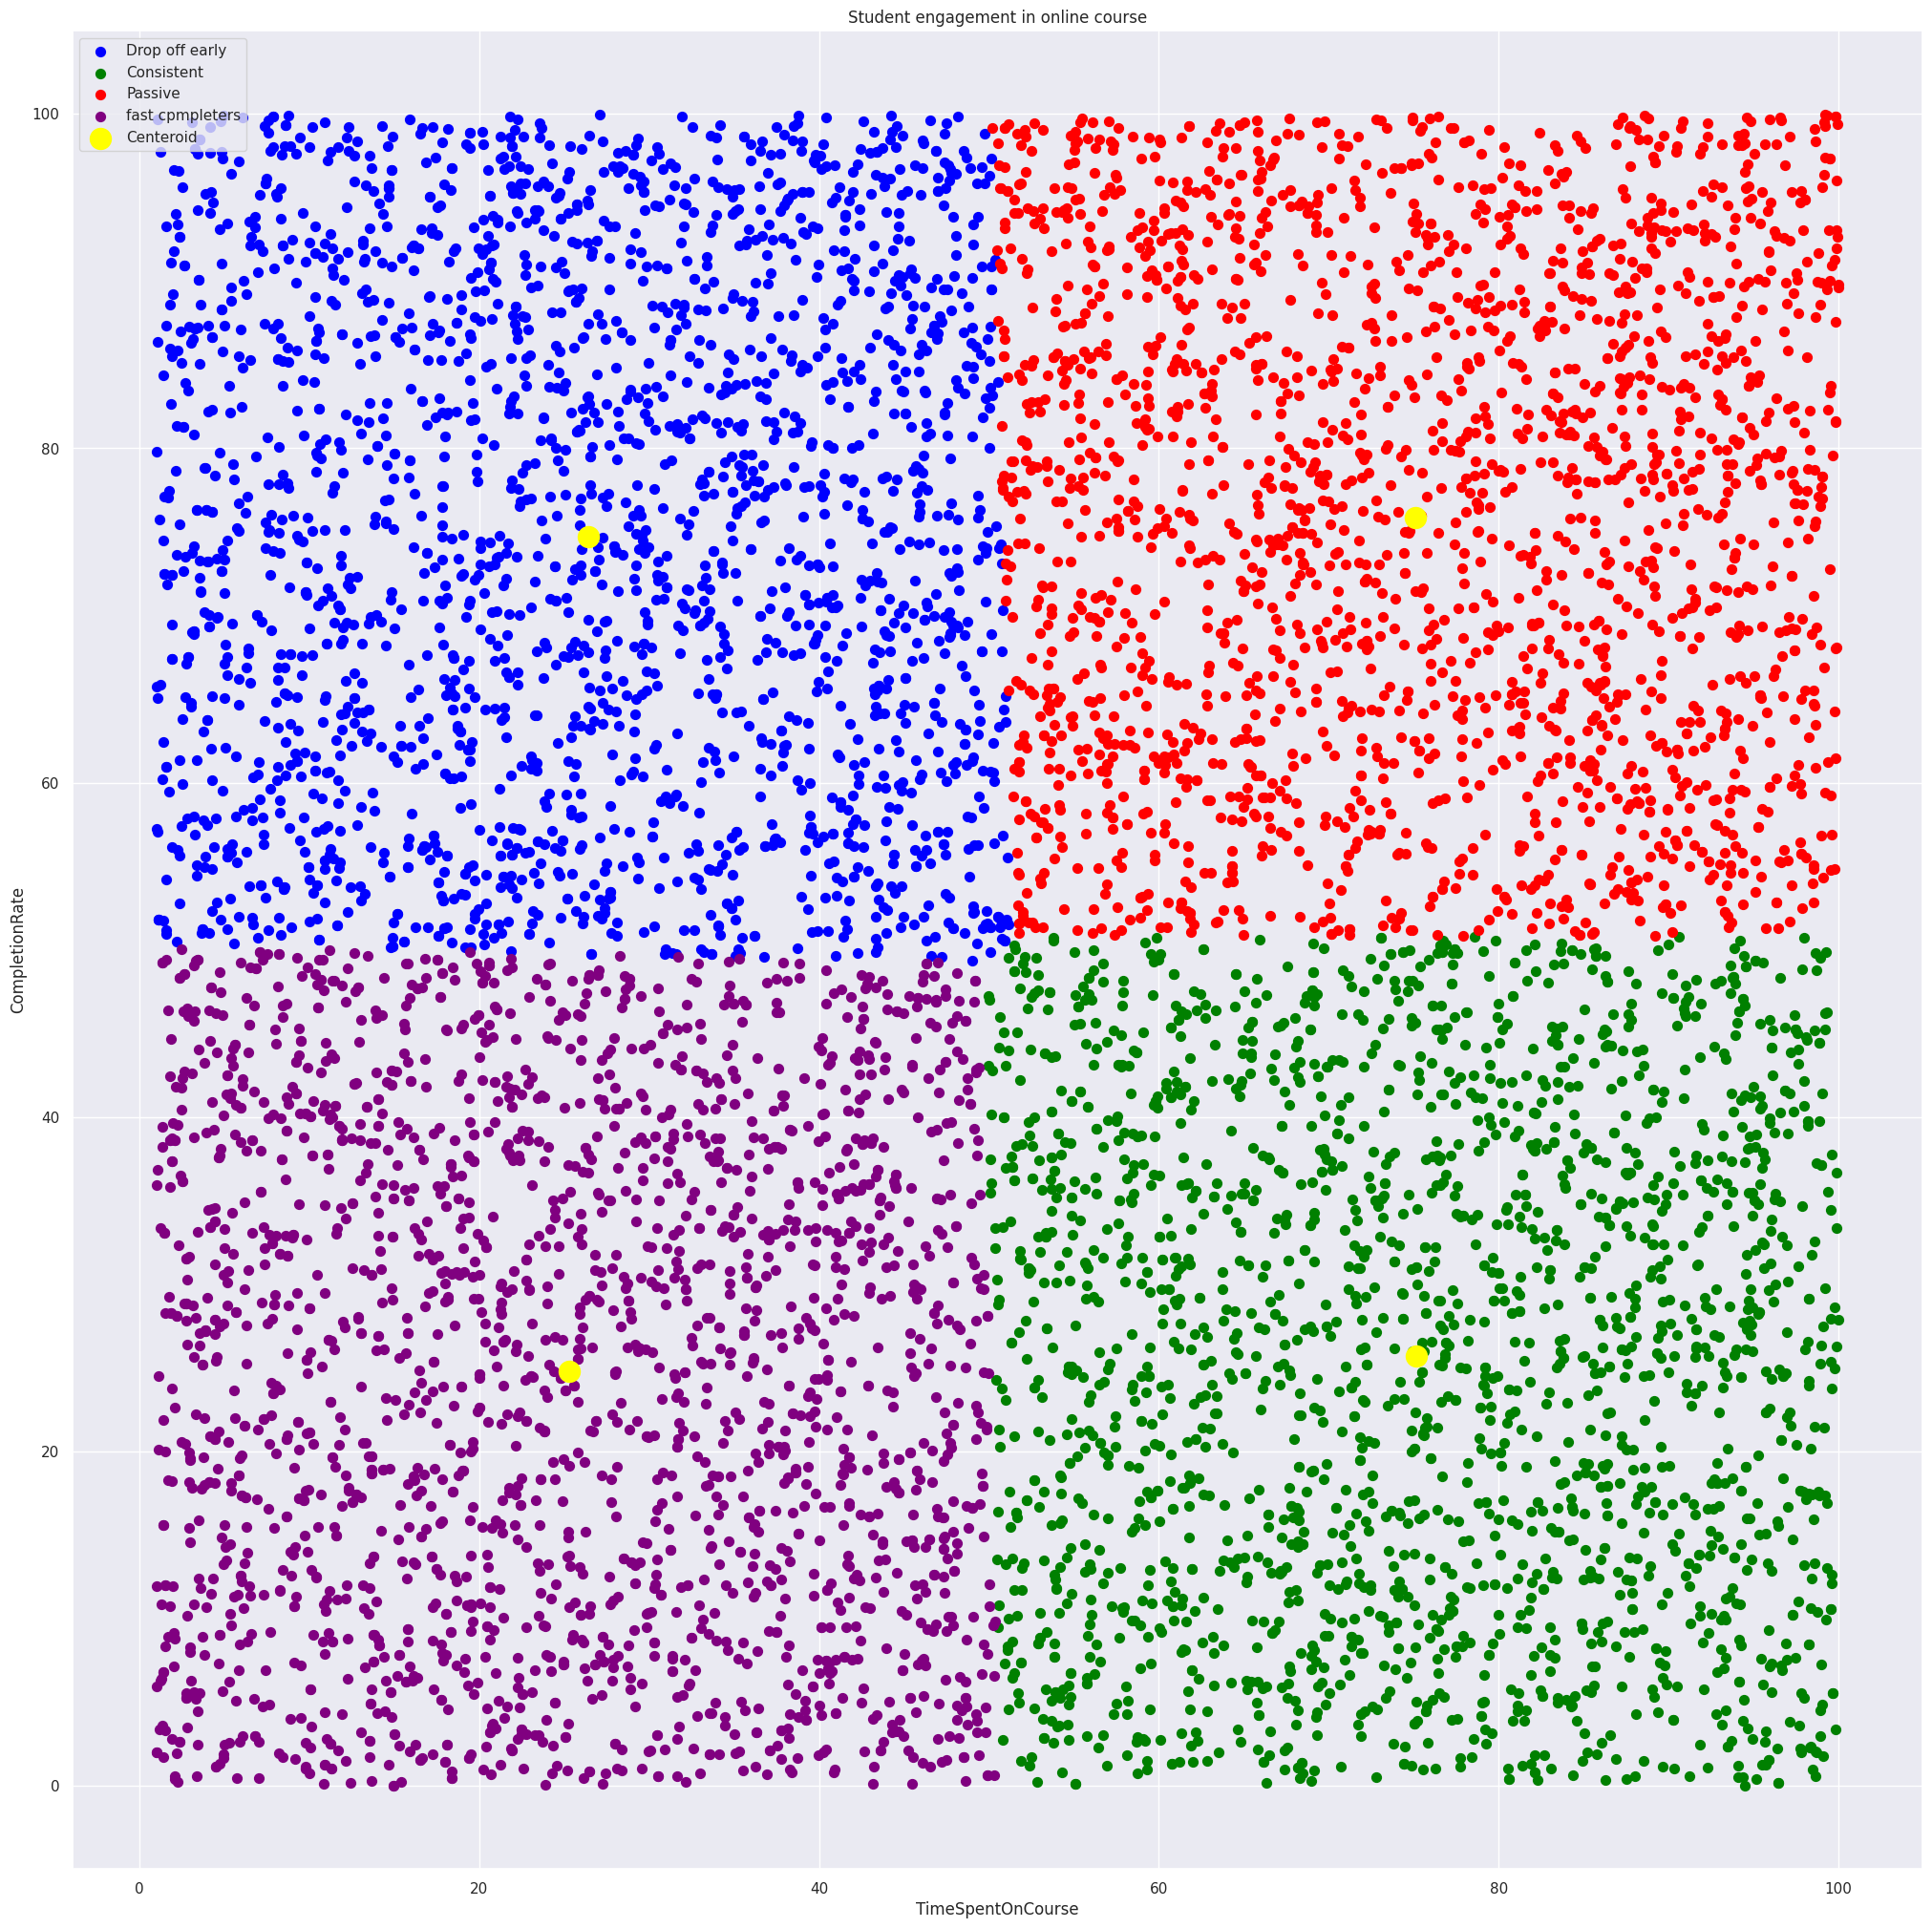

In [ ]:
plt.figure(figsize = (25,25))
plt.scatter(x[y == 0,0],x[y == 0,1],s = 50, c = 'blue', label = 'Drop off early')
plt.scatter(x[y == 1,0],x[y == 1,1],s = 50, c = 'green', label = 'Consistent' )
plt.scatter(x[y == 2,0],x[y == 2,1],s = 50, c = 'red', label = 'Passive' )
plt.scatter(x[y == 3,0],x[y == 3,1],s = 50, c = 'purple', label = 'fast cpmpleters' )
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=250, c='yellow', label = 'Centeroid')
plt.title('Student engagement in online course')
plt.xlabel('TimeSpentOnCourse')
plt.ylabel('CompletionRate')
plt.legend()
plt.show()